In [1]:
%matplotlib inline

import Bayesian_Particle_Tracking
from Bayesian_Particle_Tracking import model
from Bayesian_Particle_Tracking.model import displacement, log_likelihood, log_posterior, log_prior, diffusion
from Bayesian_Particle_Tracking import io
from Bayesian_Particle_Tracking.prior import JeffreysPrior, UniformPrior
from Bayesian_Particle_Tracking.printable import Printable
from Bayesian_Particle_Tracking import generate_data
from Bayesian_Particle_Tracking.generate_data import data_generation, generator
import emcee
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/Users/alanzhou/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
twod = generator(10000, 1e-6, 1e-10, (0,0,0), parameter = "D", ndim = 3)
print(twod.shape[1])
twod = diffusion(twod)


4


In [3]:
log_likelihood(1e-10, twod)

92022.22473825296

In [4]:
def max_likelihood(data, lower_bound, upper_bound, intervals):
    D = np.logspace(lower_bound, upper_bound, intervals)
    loglikelihood = np.array(list(map(lambda d: log_likelihood(d, data), D)))
    maxindex = np.argmax(loglikelihood)
    confidence = D[loglikelihood > (loglikelihood.max() - 0.5)]
    return D, D[maxindex], loglikelihood, confidence.min(), confidence.max()

In [5]:
D, Dbest, loglikelihood, Dmin, Dmax = max_likelihood(twod, -11, -9, 10000)
Dbest

9.8650527069587839e-11

In [6]:
print(D[loglikelihood > (loglikelihood.max() - 0.5)].min())
print(D[loglikelihood > (loglikelihood.max() - 0.5)].max())

9.72520556395e-11
1.00023030805e-10


In [11]:
sigma = np.ones(10)*7
sigma[5] = 10
sigma

array([  7.,   7.,   7.,   7.,   7.,  10.,   7.,   7.,   7.,   7.])

In [12]:
def new_sigma(array):
    array1 = array[1:len(array)]
    array2 = array[:len(array)-1]
    array = np.sqrt(array1**2+array2**2)
    return array

def new_sigma2(array):
    array = np.sqrt(2)*array
    return array

In [13]:
print(new_sigma(sigma))
print(new_sigma2(sigma))

[  9.89949494   9.89949494   9.89949494   9.89949494  12.20655562
  12.20655562   9.89949494   9.89949494   9.89949494]
[  9.89949494   9.89949494   9.89949494   9.89949494   9.89949494
  14.14213562   9.89949494   9.89949494   9.89949494   9.89949494]


In [156]:
twod1 = diffusion(generator(10000, 1e-8, 1e-10, (0,0,1), parameter = "D", ndim = 2))
twod2 = diffusion(generator(10000, 1e-8, 1e-10, (1,1,1), parameter = "D", ndim = 2))
twod3 = diffusion(generator(10000, 1e-8, 1e-10, (-1,2,3), parameter = "D", ndim = 2))

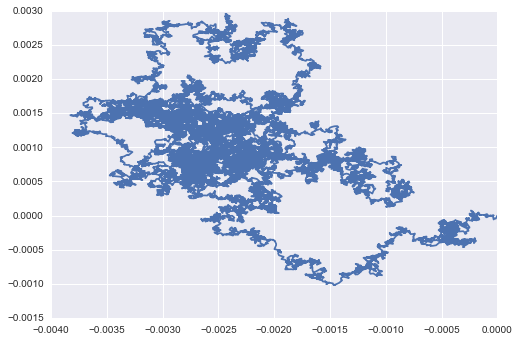

In [157]:
twod_array = np.array([twod1.data, twod2.data, twod3.data])
trajectory_x = []
trajectory_y = []
sigma = []
length = len(twod1.data)
maxcount = 3
lastx, lasty = 0, 0

for i in range (0,maxcount):
    #print("first element before change: %.3e" %twod_array[i,0,0])
    length_array = len(twod_array[i])-1
    #firstx
    twod_array[i,:,0] = (twod_array[i,:,0] - twod_array[i,0,0] + lastx)
    #print("twod - first element: %.3e" %(twod_array[i,:,0]-twod_array[i,0,0])[0])
    #print("twod - last elementt: %.3e" %(twod_array[i,:,0]-twod_array[i,0,0])[length-1])
    #print("twod - first element: with lastx %.3e"%(twod_array[i,:,0] - twod_array[i,0,0] + lastx)[0])
    #print("twod - last element: with lastx %.3e"%(twod_array[i,:,0] - twod_array[i,0,0] + lastx)[length-1])
    #firsty
    twod_array[i,:,1] = (twod_array[i,:,1] - twod_array[i,0,1] + lasty)
    #lastx, lasty
    lastx, lasty = twod_array[i,length-1,0], twod_array[i,length-1,1]
    trajectory_x += list(twod_array[i,:,0])
    trajectory_y += list(twod_array[i,:,1])
    #print("last element: %.4e" %lastx)
    sigma += list(twod_array[i,:,2])
    
trajectory_x = np.array(trajectory_x)
trajectory_y = np.array(trajectory_y)
positions = np.array((trajectory_x, trajectory_y, sigma)).T
plt.plot(positions[:,0], positions[:,1])

In [158]:
trajectory_x[99]

-0.0002400972651651442

In [159]:
x_difference = (np.diff(trajectory_x))
index = x_difference[abs(x_difference) > .0001]
counter = np.arange(0,len(x_difference))
counter[abs(x_difference) > .0001]

array([], dtype=int64)

In [161]:
positions = diffusion(positions)

In [162]:
def max_likelihood(data, lower_bound, upper_bound, intervals):
    D = np.logspace(lower_bound, upper_bound, intervals)
    loglikelihood = np.array(list(map(lambda d: log_likelihood(d, data), D)))
    maxindex = np.argmax(loglikelihood)
    confidence = D[loglikelihood > (loglikelihood.max() - 0.5)]
    return D, D[maxindex], loglikelihood, confidence.min(), confidence.max()

In [163]:
D, Dbest, loglikelihood, Dmin, Dmax = max_likelihood(positions, -11, -9, 10000)

In [164]:
Dbest

1.0006910833004608e-10

In [112]:
print(len(twod.data[9999]))

4


In [ ]:
particle_max = 13808

lastrow = [0,0,0,0]
single = []

for i in range(0,5):
    if relevant[relevant['particle'] == i].empty == False:
        frame = np.array(relevant[relevant['particle'] == i][['x','y', 'ep', 'frame']])
        firstrow = [frame[0,0], frame[0,1], frame[0,2], frame[0,3]]
        new_frame = frame - firstrow + lastrow 
        #print("new_frame: \n %s" %new_frame)
        length = len(frame)-1
        lastrow = [new_frame[length,0], new_frame[length,1], new_frame[length,2], new_frame[length,3]]
        #print(lastrow)
        single += list(new_frame)